In [1]:
import pandas as pd
df = pd.read_csv("complete_data_to_value.csv", delimiter=',')
geodf = df.loc[:,['Latitude', 'Longitude']]
geodf

,Latitude,Longitude
0,35.026360,-114.383510
1,35.003500,-109.789610
2,35.105440,-106.669673
3,34.946660,-104.647300
4,35.188640,-101.986020
5,35.266110,-99.638740
6,35.515720,-97.670800
7,36.163605,-95.759500
8,37.689186,-92.647300
9,38.663030,-90.218080


In [2]:
df2 = pd.read_csv("coords_diamonds.csv", delimiter=',')
geodf2 = df2.loc[:,['latitude', 'longitude ']]
geodf2.rename(columns = {'longitude ':'Longitude', 'latitude': 'Latitude'}, inplace = True)
#pru = geodf2['latitude'].values.tolist()
#pru2 = []
#for elem in pru:
#    pru2.append(float(elem))
#pru2

In [3]:
for i, val in enumerate(geodf2['Latitude']):
    try:
        float(val)
    except ValueError:
        geodf2 = geodf2.drop(i)
        print(i)

48185


<Axes: >

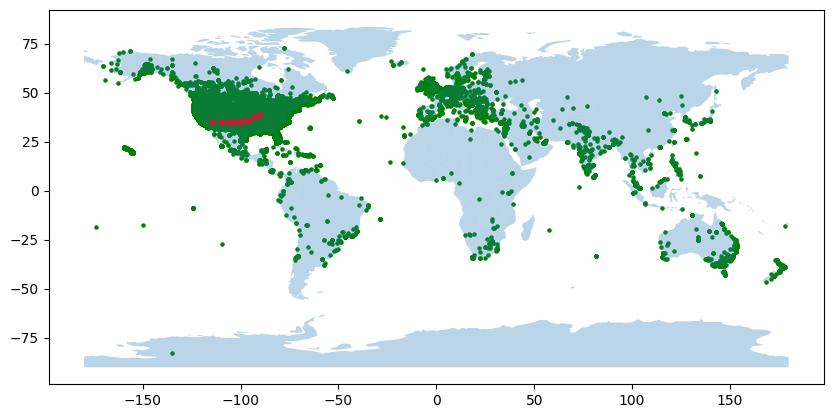

In [4]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(geodf['Longitude'], geodf['Latitude'])]
gdf = GeoDataFrame(geodf, geometry=geometry)

geometry2 = [Point(xy) for xy in zip(geodf2['Longitude'], geodf2['Latitude'])]
gdf2 = GeoDataFrame(geodf2, geometry=geometry2)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))


gdf2.plot(ax=ax, marker='o', color='green', markersize=5)
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

world.plot(ax=ax, alpha=0.3)

#gdf2.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='blue', markersize=5)

In [46]:
df3 = pd.read_csv("diamonds.csv", delimiter=',')
df3.describe()


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000
mean,26964.500000,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141
std,15568.394346,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909
min,0.000000,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000
25%,13482.250000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26964.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40446.750000,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,53929.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [48]:
abs(-2)

2

In [49]:
df_pr = pd.DataFrame()

df_pr['xyz']= abs(df3['x'])*abs(df3['y'])*abs(df3['y'])/np.sqrt(df3['x']**2+df3['y']**2+df3['z']**2)
df_pr['price']= df3['price']
df_pr
#df_pr.describe()
#df_pr.plot(x= 'price', y = 'xyz')

,xyz,price
0,10.238368,326
1,9.666196,326
2,10.839883,327
3,11.534325,334
4,12.198893,335
...,...,...
53925,21.533041,2757
53926,21.237050,2757
53927,20.813631,2757
53928,24.380273,2757


In [50]:
df_pr[df_pr['xyz']>100]

,xyz,price
24063,467.789727,12210


In [51]:
df_pr = df_pr.drop(24063)

In [52]:
df_pr[df_pr['xyz']<7.3]

,xyz,price
11181,0.000000,4954
48401,4.163114,1970


In [53]:
df_pr = df_pr.drop(11181)
df_pr = df_pr.drop(48401)

In [54]:
import numpy as np
logxyz = np.log(df_pr['xyz'])
logprice = np.log(df_pr['price'])

df_pr2= pd.DataFrame()
df_pr2['logxyz'] = logxyz
df_pr2['logprice'] = logprice
df_pr2.dropna()
#logxyz= logxyz.dropna()
#df_pr.plot(x= 'price', y = 'xyz')

#logprice = np.log(df_pr['price'])
#logprice= logprice.dropna();

,logxyz,logprice
0,2.326142,5.786897
1,2.268635,5.786897
2,2.383232,5.789960
3,2.445327,5.811141
4,2.501345,5.814131
...,...,...
53924,3.051624,7.921898
53925,3.069589,7.921898
53926,3.055747,7.921898
53927,3.035608,7.921898


<Axes: xlabel='logxyz', ylabel='logprice'>

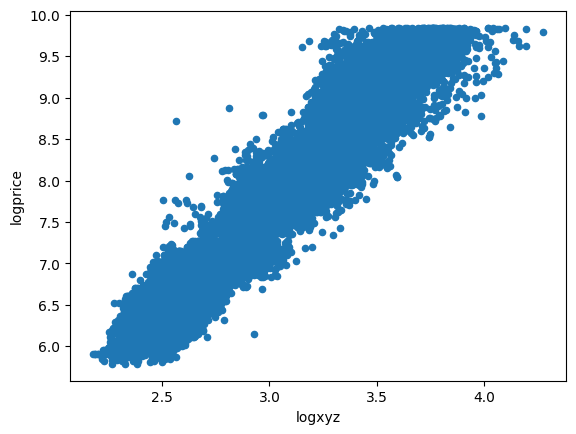

In [55]:
df_pr2.plot(kind = 'scatter', x= 'logxyz', y = 'logprice')

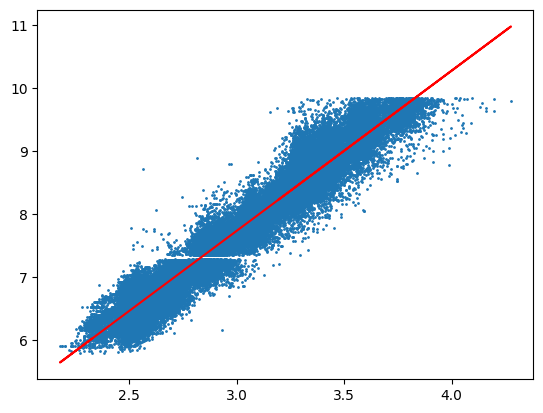

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
df_pr2= df_pr2.dropna()
X = df_pr2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_pr2.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y, s=1)
plt.plot(X, Y_pred, color='red')
plt.show()

In [96]:
# The coefficients
print("Coefficients: \n", linear_regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y, Y_pred))

Coefficients: 
 [[2.54344911]]
Mean squared error: 0.07
Coefficient of determination: 0.93


In [106]:
df_pr3 = pd.DataFrame()

df_pr3['xyz^p']= (abs(df3['x']*df3['y']*df3['y'])/np.sqrt(df3['x']**2+df3['y']**2+df3['z']**2))**5/2
df_pr3['price']= df3['price']
df_pr3 = df_pr3.dropna()
#df_pr.describe()
#df_pr.plot(x= 'price', y = 'xyz')

In [118]:
df_pr3[df_pr3['xyz^p']>10**12]

,xyz^p,price
24063,1.120014e+13,12210


In [119]:
df_pr3=df_pr3.drop(24063)

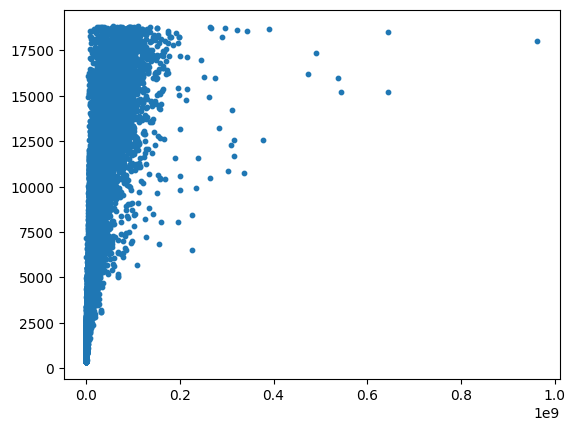

In [122]:
X = df_pr3.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_pr3.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor2.predict(X)  # make predictions
plt.scatter(X, Y, s=10)
#plt.plot(X, Y_pred, color = 'red')
plt.show()

In [191]:
_ = df3[np.isnan(df3['x'])==True]
_[np.isnan(_['y'])==True]


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
73,73,0.30,Premium,H,SI1,NaN,57.0,554,NaN,NaN,2.67
345,345,0.70,Very Good,D,SI1,NaN,58.0,2804,NaN,NaN,3.56
544,544,0.80,Good,E,SI2,NaN,54.0,2829,NaN,NaN,3.75
553,553,0.53,Ideal,F,VVS1,NaN,57.0,2830,NaN,NaN,3.20
592,592,0.70,Ideal,E,VS1,NaN,56.0,2837,NaN,NaN,3.53
...,...,...,...,...,...,...,...,...,...,...,...
53611,53611,0.35,Premium,I,VS1,NaN,60.0,552,NaN,NaN,2.78
53690,53690,0.70,Ideal,F,VS2,NaN,56.0,2717,NaN,NaN,3.51
53719,53719,0.57,Ideal,F,VVS2,NaN,56.0,2722,NaN,NaN,3.25
53904,53904,0.84,Good,I,VS1,NaN,59.0,2753,NaN,NaN,3.77


In [194]:
df3.isnull().sum()

Unnamed: 0       0
carat            0
cut              0
color            0
clarity          0
depth         2962
table            0
price            0
x             1090
y              585
z                0
dtype: int64

In [167]:
_ == np.nan

False